### **Merkle Tree Implementation for File Transfer**

In [30]:
import hashlib

In [41]:
def chunk_file(file_path, chunk_size):
    chunks = []
    with open(file_path, "r") as f:
        while True:
            chunk = f.read(chunk_size)
            if chunk:
                chunks.append(chunk)
            else:
                break
    return chunks

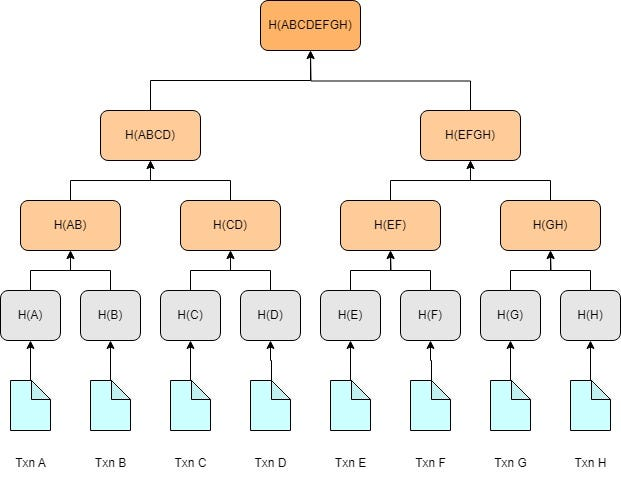

In [47]:
def merkle_tree(chunks):
    if len(chunks) == 1:
        return hashlib.sha256(chunks[0].encode()).hexdigest()

    mid = len(chunks) // 2
    left_hash = merkle_tree(chunks[:mid])
    right_hash = merkle_tree(chunks[mid:])
    print(f"Left Chunk:{chunks[:mid]}, Left Hash: {left_hash}\nRight Chunk:{chunks[mid:]}, Right Hash: {right_hash}\n")

    return hashlib.sha256(left_hash.encode() + right_hash.encode()).hexdigest()

In [48]:
chunks = chunk_file("testing.txt", 10)
chunks

['Hello! thi', 's is a tes', 'ting file ', 'check chec', 'k.']

In [49]:
merkle_tree(chunks)

Left Chunk:['Hello! thi'], Left Hash: 630da2893b173a2964afa5def90efa1ae13ad81941a17c09a06c415fdab69ec9
Right Chunk:['s is a tes'], Right Hash: 4f21ff2f65af41696f03015b115a6fe2486550d23a7fa7fbf9ced7a8f71fe147

Left Chunk:['check chec'], Left Hash: cace66de7d0ed9a8055e86c2e0402f770e623a727aa03b528bbbdd073d2a2991
Right Chunk:['k.'], Right Hash: cf4cdd0174f724805681f17b68510a5d342eea4c43a621935a9539622433015f

Left Chunk:['ting file '], Left Hash: 6325347d1fd1791a7ddefd6f7491a334848412eac22c02eb677db1480d9495fe
Right Chunk:['check chec', 'k.'], Right Hash: b1d4468cfcc7da67d0041cffaa72d5b74f1a81aa779dc20a1626cce95d653ba6

Left Chunk:['Hello! thi', 's is a tes'], Left Hash: 6c122a5990e77f9bb40df0457abb0579f81c8cc2be71c4169d30e1922c75587e
Right Chunk:['ting file ', 'check chec', 'k.'], Right Hash: 19725b55a60977dfe5c2f386b8ba6bf7af77293bf0d80351a8bc782b96dc41e9



'd2646a0aa9825af912a6909006c8b48fba99a5471a2b97f8e70288a31f6b2686'